### Instructor Demo: Returns

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for a specified date range.

Equation: $r=\frac{{p_{t}} - {p_{0}}}{p_{0}}$

Where $r$ is return on investment, ${p_{t}}$ is the price at time $t$, and ${p_{0}}$ is the initial price

In [1]:
import pandas as pd
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Read in the CSV as a DataFrame
sp500_csv = pd.read_csv('../Resources/sp500_stock_data.csv')
sp500_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-02,1885.300049,1891.329956,1878.500000,1881.140015,1881.140015,3159560000
1,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
2,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
3,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
4,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000


In [3]:
sp500_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


### View Summary Statistics

In [5]:
# Use the 'describe()' function
sp500_all = sp500_csv.describe(include='all')
sp500_all 
sp500_numbers_only = sp500_csv.describe()
sp500_numbers_only

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2316.801637,2326.829332,2305.725223,2317.082948,2317.082948,3.596083e+09
std,317.895587,318.579627,317.124199,317.705702,317.705702,6.939543e+08
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.349780e+09
25%,2057.875000,2067.634888,2044.870025,2058.322449,2058.322449,3.188478e+09
50%,2179.030029,2184.969971,2172.895019,2180.639893,2180.639893,3.504925e+09
75%,2636.292481,2652.804931,2612.815063,2636.575012,2636.575012,3.893518e+09
max,2952.330078,2954.129883,2939.350098,2945.830078,2945.830078,7.609010e+09


### Drop Extra Columns

In [ ]:
# See what are the columns in  a dataframe
# sp500_csv.columns

In [6]:
# Drop unnecessary columns
sp500_csv.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
sp500_csv.head()

,Date,Adj Close
0,2014-05-02,1881.140015
1,2014-05-05,1884.660034
2,2014-05-06,1867.719971
3,2014-05-07,1878.209961
4,2014-05-08,1875.630005


In [ ]:
# DROP COLUMNS WITHOUT USING INPLACE. ASSING IT TO A NEW VARIABLE
# sp500_adj_close = sp500_csv.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
# sp500_adj_close

In [7]:
sp500_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Adj Close  1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


### Set Date as Index

In [8]:
# Transform the date column to a datetime data type
sp500_csv['Date'] = pd.to_datetime(sp500_csv['Date'], infer_datetime_format=True)
sp500_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [9]:
# Set the date as the index to the DataFrame
# sp500_csv.set_index(pd.to_datetime(sp500_csv['Date'], infer_datetime_format=True), inplace=True) #one way to do it in a single line of code
sp500_csv.set_index(sp500_csv['Date'], inplace=True)
sp500_csv.head()

,Date,Adj Close
Date,,
2014-05-02,2014-05-02,1881.140015
2014-05-05,2014-05-05,1884.660034
2014-05-06,2014-05-06,1867.719971
2014-05-07,2014-05-07,1878.209961
2014-05-08,2014-05-08,1875.630005


### Drop Extra Date Column

In [10]:
# Drop the extra date column
sp500_csv.drop(columns=['Date'], inplace=True)
sp500_csv.head()

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


### Plot Daily Close

<AxesSubplot:xlabel='Date'>

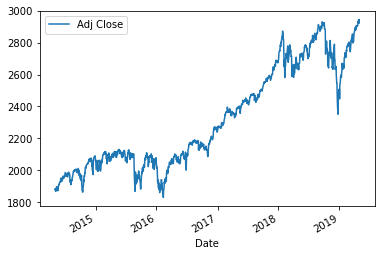

In [11]:
# Plot the daily closing stock price of the S&P 500 over the last 5 years
sp500_csv.plot()

### Calculate Daily Returns (Method 1)

Equation: $r=\frac{{p_{t}} - {p_{t-1}}}{p_{t-1}}$

Where $r$ is daily returns, ${p_{t}}$ is the price at time $t$, and ${p_{t-1}}$ is the price at $t-1$ (offset by 1).

In [12]:
# Calculate the daily return using the 'shift()' function
daily_returns = (sp500_csv - sp500_csv.shift(1)) / sp500_csv.shift(1)
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


### Calculate Daily Returns (Method 2)

In [13]:
# Calculate the daily return using the 'pct_change()' function
daily_returns = sp500_csv.pct_change()
daily_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374


### Plot Daily Returns

<AxesSubplot:xlabel='Date'>

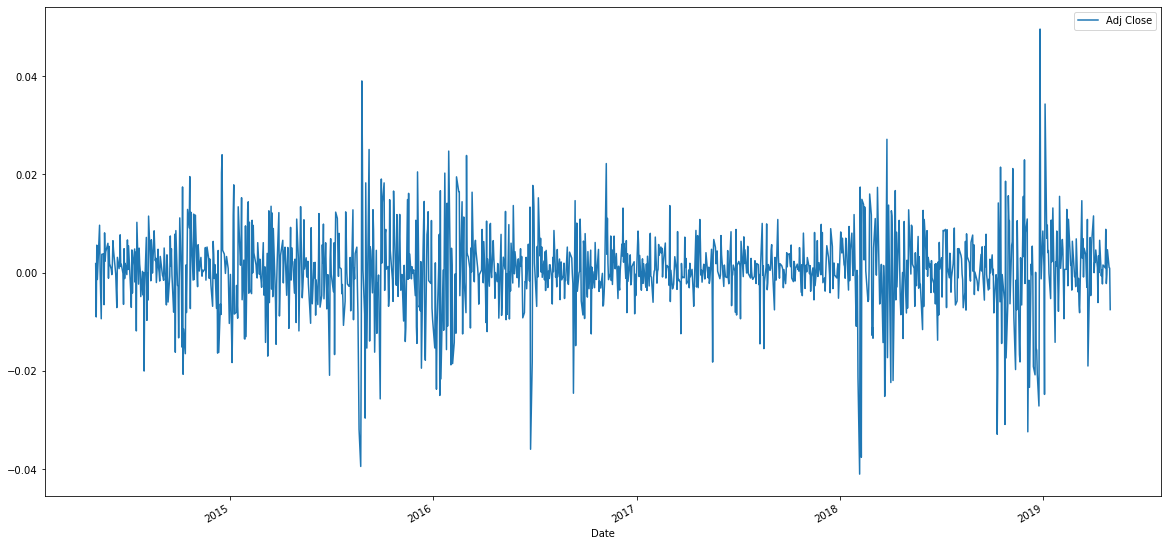

In [15]:
# Plot the daily returns of the S&P 500 over the last 5 years
daily_returns.plot(figsize=(20,10))

### Calculate Cumulative Returns

In [16]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,Adj Close
Date,
2014-05-02,NaN
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071


### Plot Cumulative Returns

<AxesSubplot:xlabel='Date'>

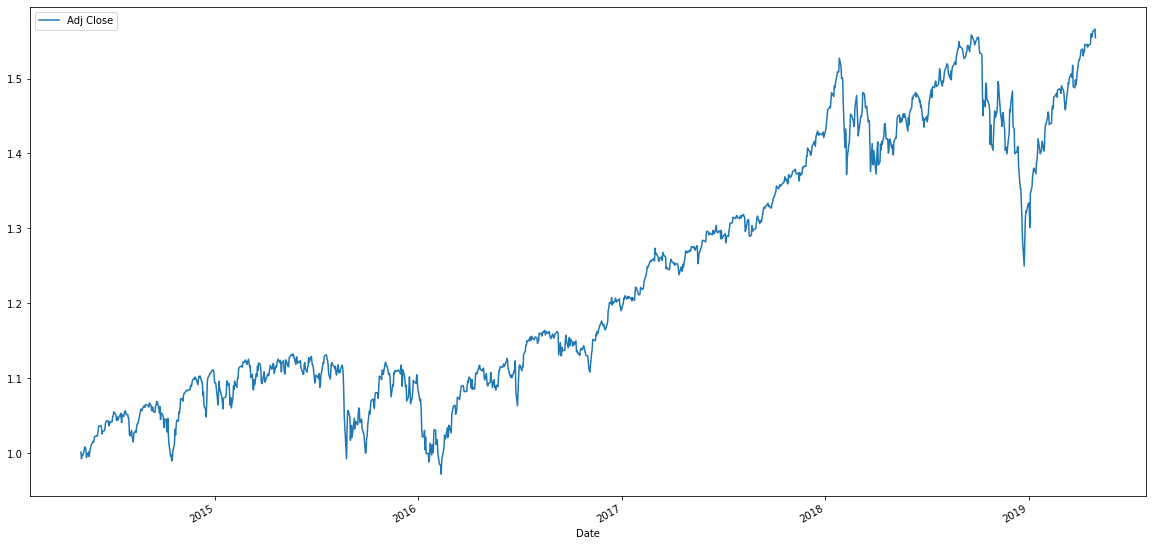

In [18]:
# Plot the daily returns of the S&P 500 over the last 5 years
cumulative_returns.plot(figsize=(20,10))

* Cumulative returns express the total percentage increase in teh value of an investment from the time it was purchased
* Cumulative returns of a specific asset/stock does not have interest or dividends, it is easily calulate by figuring out the amount of profit or loss over a the original price independent of the amount of time involved
* Why we use adjusted closing price? We used adjusted closing price incorporates the impact of interest, dividends, stock splits, and other chanes on the asset price. 
* Cummulative return = (Current - Original)/Original -> The cummulative return it tends to trends upward with time (grows over time) so you might think that the older the stocks the better your investment. Wrong!! Cummulative return is not a good way to compare investments, unless you are comparing two stocks/assets that were launched at the same time